# Ingenieria de Datos COMPLETA

Dataset dividido por Columnas

In [2]:
# Instalación de librerías
install.packages(c("tidyverse", "corrplot", "gridExtra", "DataExplorer"))
library(tidyverse)
library(corrplot)
library(gridExtra)
library(DataExplorer)

# Cargar y filtrar solo las columnas solicitadas
df_raw <- read.csv("ecommerce_customer_churn_dataset.csv")

target_cols <- c("Age", "Gender", "Country", "Membership_Years", "Login_Frequency",
                 "Cart_Abandonment_Rate", "Total_Purchases", "Days_Since_Last_Purchase",
                 "Returns_Rate", "Product_Reviews_Written", "Social_Media_Engagement_Score",
                 "Mobile_App_Usage", "Credit_Balance", "Churned")

df <- df_raw %>% select(all_of(target_cols))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘reshape2’, ‘networkD3’




In [3]:
# Guardar el dataset procesado
write.csv(df, "dataset_columnas.csv", row.names = FALSE)
print("Archivo 'dataset_columnas' generado con éxito.")

[1] "Archivo 'dataset_columnas' generado con éxito."


Limpieza de Datos (Data Cleaning)
Como ingeniero, aseguras la integridad. Corregimos valores imposibles y gestionamos nulos sin perder filas.

In [48]:
# Limpieza profunda
df_clean <- df %>%
  # 1. Corregir edades (máximo 100 años) y valores negativos en compras
  mutate(Age = ifelse(Age > 100 | Age < 0, median(Age, na.rm = TRUE), Age),
         Total_Purchases = ifelse(Total_Purchases < 0, 0, Total_Purchases)) %>%

  # 2. Imputación de nulos (Mediana para números, Moda para categorías)
  mutate(across(where(is.numeric), ~replace_na(., median(., na.rm = TRUE))),
         across(where(is.character), ~replace_na(., names(which.max(table(.))))))

# Convertir tipos de datos correctos
df_clean$Gender <- as.factor(df_clean$Gender)
df_clean$Country <- as.factor(df_clean$Country)
df_clean$Churned <- as.factor(df_clean$Churned)

print("Check de nulos post-limpieza:")
print(colSums(is.na(df_clean)))

[1] "Check de nulos post-limpieza:"
                          Age                        Gender 
                            0                             0 
                      Country              Membership_Years 
                            0                             0 
              Login_Frequency         Cart_Abandonment_Rate 
                            0                             0 
              Total_Purchases      Days_Since_Last_Purchase 
                            0                             0 
                 Returns_Rate       Product_Reviews_Written 
                            0                             0 
Social_Media_Engagement_Score              Mobile_App_Usage 
                            0                             0 
               Credit_Balance                       Churned 
                            0                             0 


In [50]:
# Guardar el dataset procesado
write.csv(df_clean, "dataset_nonulos.csv", row.names = FALSE)
print("Archivo 'dataset_nonulos' generado con éxito.")

[1] "Archivo 'dataset_nonulos' generado con éxito."


In [40]:
library(tidyverse)
library(corrplot)

# Paleta Modern Fusion (Equilibrada y sofisticada)
# Violeta Profundo, Turquesa Eléctrico, Coral, Azul Acero, Lima Suave, Rosa Malva, Gris Carbono, Arena
mi_paleta <- c("#6C5CE7", "#00CEC9", "#FF7675", "#0984E3", "#55E6C1", "#FD79A8", "#2D3436", "#DFE6E9")

# Funciones de aplicación
scale_fill_custom <- function() scale_fill_manual(values = mi_paleta)
scale_color_custom <- function() scale_color_manual(values = mi_paleta)

# Distribución del Target

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


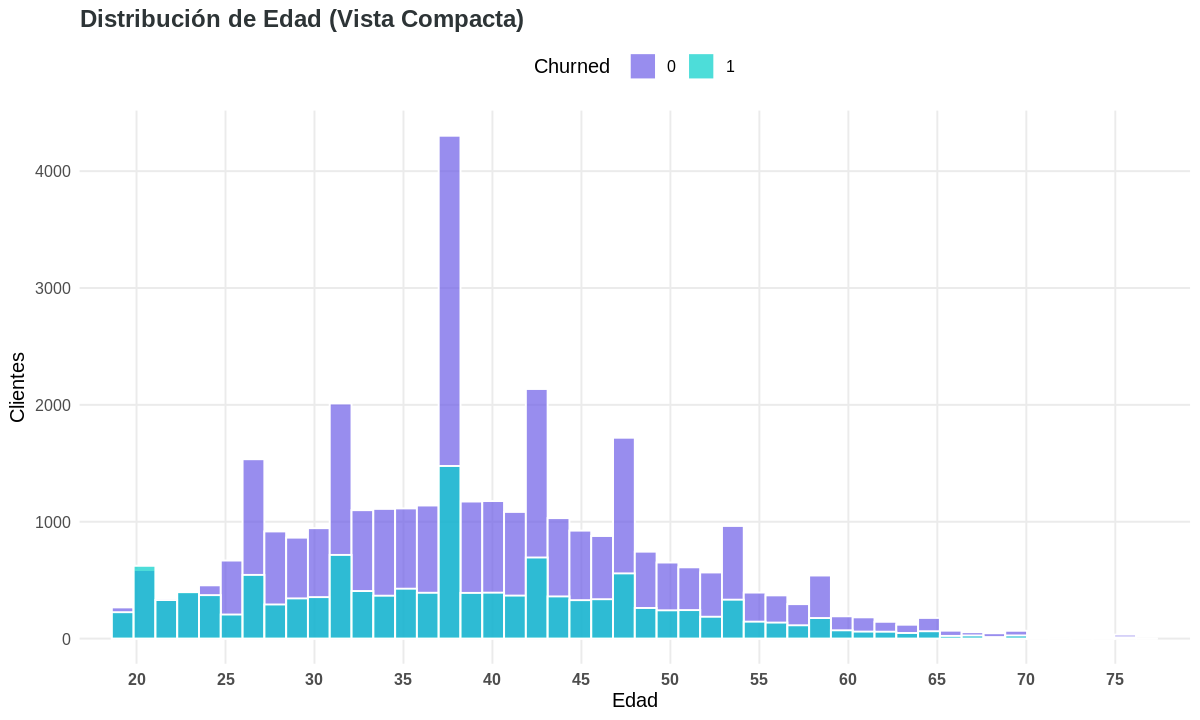

In [95]:
# 1. Ajustamos a un tamaño más compacto y estándar (proporción 10:6)
options(repr.plot.width = 10, repr.plot.height = 6)

# 2. Gráfica compacta y precisa
df_clean %>%
  filter(Age >= 18) %>%
  ggplot(aes(x = Age, fill = Churned)) +

  # Reducimos un poco los bins para que las barras no sean hilos
  geom_histogram(bins = 50, color = "white", alpha = 0.7, position = "identity") +

  # Eje X ajustado: marcas cada 5 años es más limpio en formatos compactos
  scale_x_continuous(
    breaks = seq(20, 80, by = 5),
    limits = c(18, 78),
    expand = c(0.02, 0) # Un pequeño margen para que no toque el borde exacto
  ) +

  labs(
    title = "Distribución de Edad (Vista Compacta)",
    x = "Edad",
    y = "Clientes"
  ) +

  scale_fill_custom() +

  # Ajustamos el tamaño de fuente para que no sea gigante
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "top",
    panel.grid.minor = element_blank(),
    plot.title = element_text(face = "bold", color = mi_paleta[7]),
    axis.text.x = element_text(face = "bold") # Quitamos el ángulo para que se vea más recto y ordenado
  )

# Análisis por País

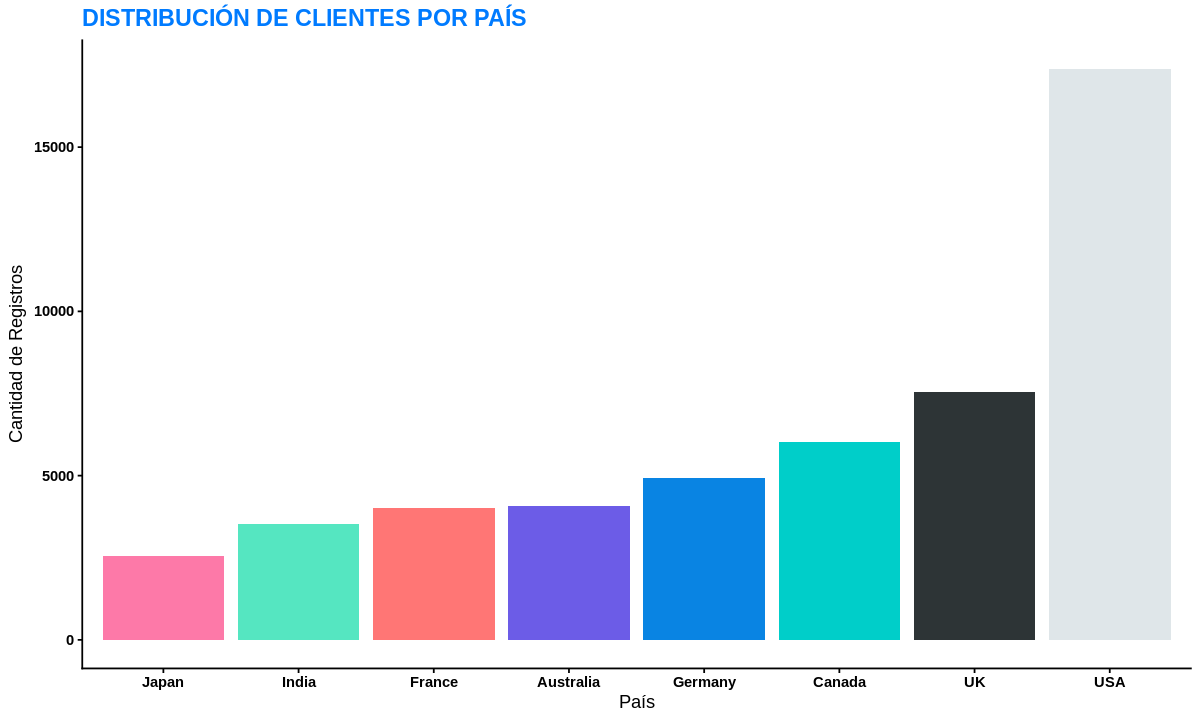

In [63]:
# Gráfica: Análisis Geográfico (Orden Ascendente + Paleta Electric)
ggplot(df_clean, aes(x = fct_rev(fct_infreq(Country)), fill = Country)) +
  geom_bar() + # Borde negro fino para resaltar el color
  labs(
    title = "DISTRIBUCIÓN DE CLIENTES POR PAÍS",
    x = "País",
    y = "Cantidad de Registros"
  ) +
  theme_classic() +
  scale_fill_custom() + # Aplicación de la paleta llamativa
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", color = "#007BFF", size = 14),
    axis.text = element_text(face = "bold")
  )

# Gráfica de Género (Volumen de Clientes)

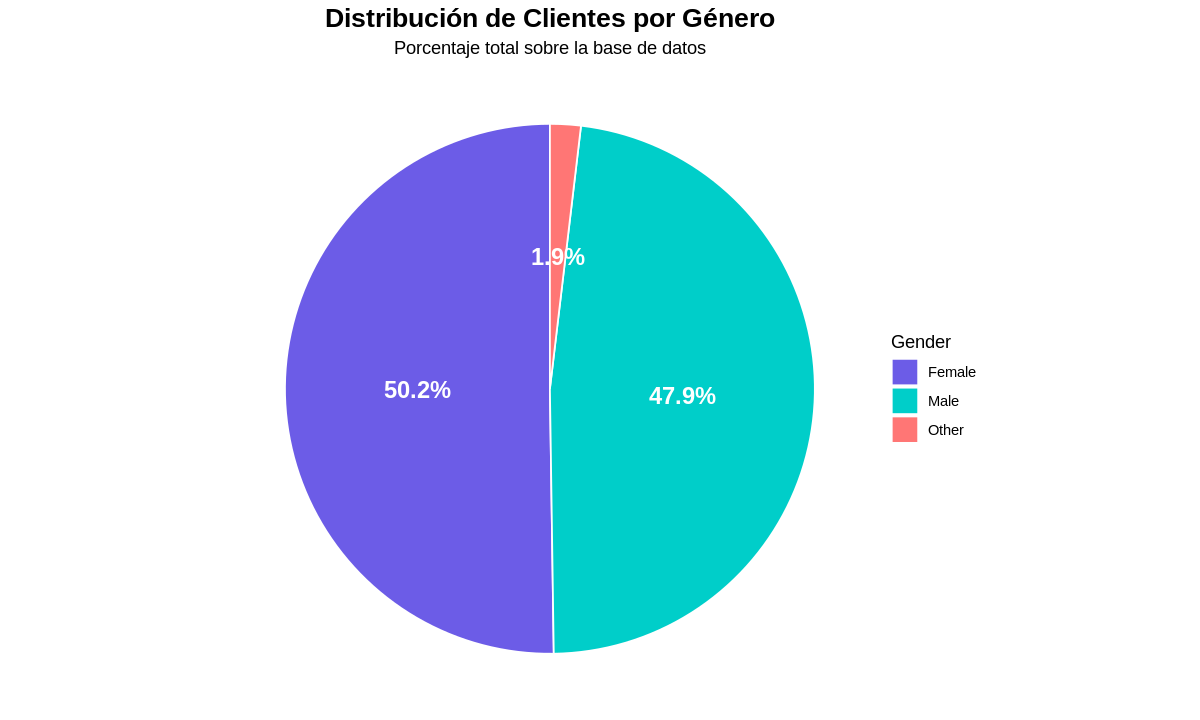

In [96]:
# Calculamos las etiquetas primero
df_pie <- df_clean %>%
  count(Gender) %>%
  mutate(prop = n / sum(n),
         label = scales::percent(prop))

# Gráfico optimizado
ggplot(df_pie, aes(x = "", y = n, fill = Gender)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0) +
  # Añadimos los porcentajes sobre la tarta
  geom_text(aes(label = label),
            position = position_stack(vjust = 0.5),
            color = "white", fontface = "bold", size = 5) +
  labs(title = "Distribución de Clientes por Género",
       subtitle = "Porcentaje total sobre la base de datos",
       x = NULL, y = NULL) +
  theme_void() +
  scale_fill_custom() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
        plot.subtitle = element_text(hjust = 0.5))

# Mapa de Correlación

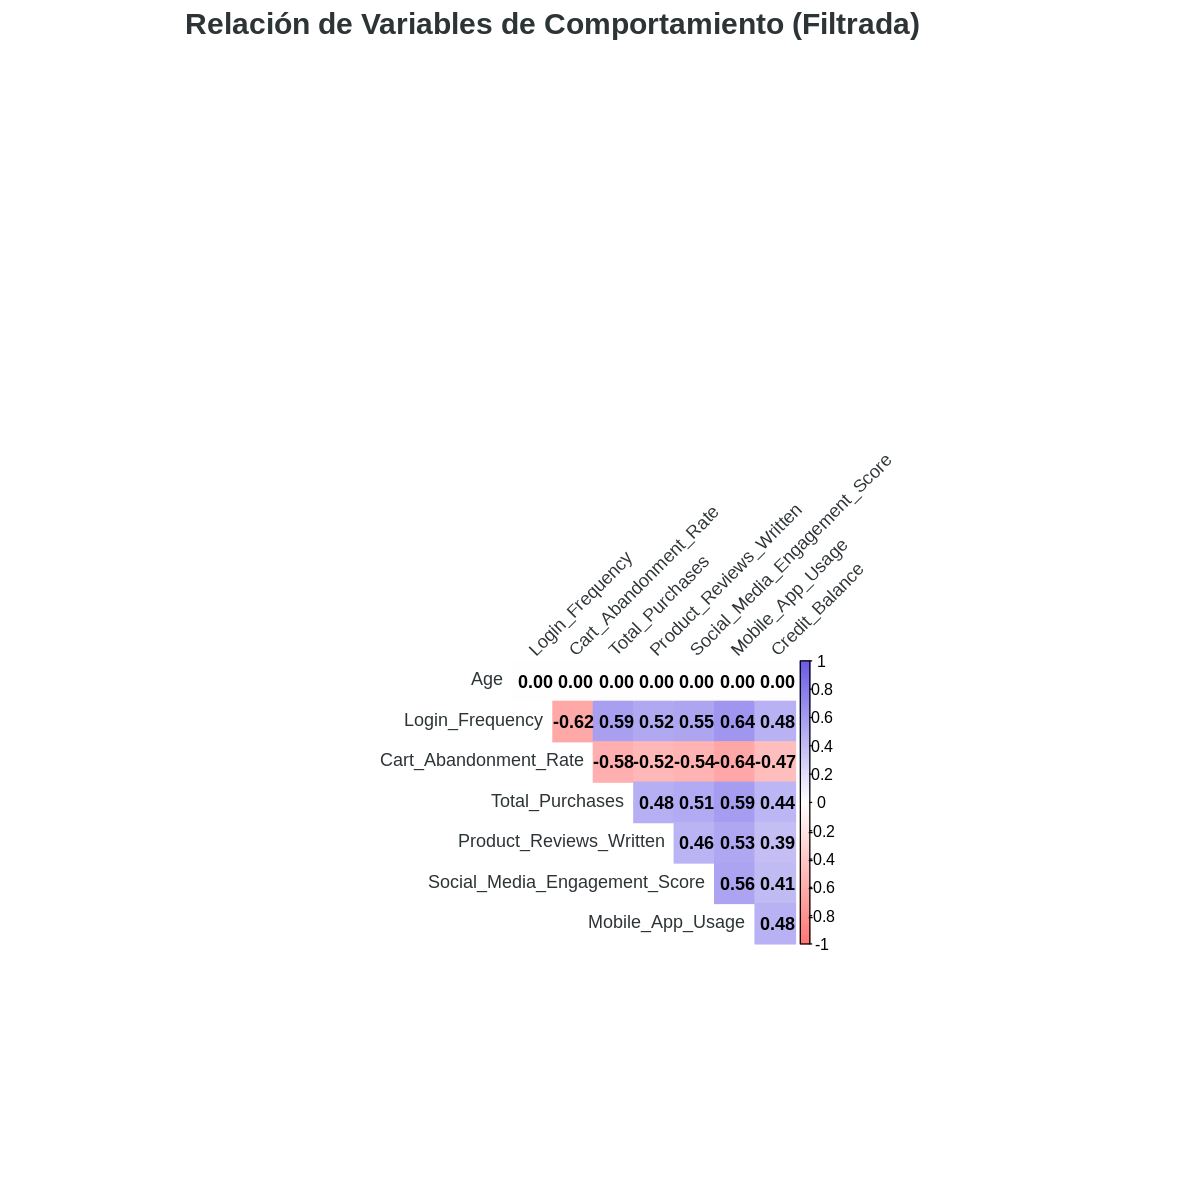

In [92]:
# 1. Ajuste de dimensiones de la imagen (más cuadrada para centrar)
options(repr.plot.width = 10, repr.plot.height = 10)

# 2. Preparación de datos (igual que antes)
num_data_filtrada <- df_clean %>%
  select(where(is.numeric)) %>%
  select(-all_of(c("Membership_Years", "Days_Since_Last_Purchase", "Returns_Rate")))

cor_matrix <- cor(num_data_filtrada, use = "complete.obs")
col_gradiente <- colorRampPalette(c(mi_paleta[3], "#FFFFFF", mi_paleta[1]))(200)

# 3. Graficar con corrección de solapamiento
corrplot(cor_matrix,
         method = "color",
         type = "upper",
         col = col_gradiente,
         tl.col = mi_paleta[7],
         tl.srt = 45,             # Rotamos etiquetas 45 grados para evitar que choquen
         tl.cex = 0.9,            # Tamaño de texto de etiquetas
         addCoef.col = "black",
         number.cex = 0.9,
         diag = FALSE,
         mar = c(1, 1, 4, 1))     # Aumentamos el margen superior (el tercer número)

# 4. Añadimos el título de forma independiente para que NO se solape
mtext("Relación de Variables de Comportamiento (Filtrada)",
      at = 2.5,                   # Centrado horizontal
      line = 2.5,                 # Distancia vertical (lo sube para que no toque las etiquetas)
      cex = 1.5,                  # Tamaño del título
      font = 2,                   # Negrita
      col = mi_paleta[7])         # Color de tu paleta

# FEATURE ENGINEERING

In [70]:
install.packages("fastDummies")
library(fastDummies)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# DATASET preparado para alta precisión con modelo de IA

In [94]:
# 1. Cargar librerías
library(tidyverse)

# 2. Transformación de Alta Precisión
# Usamos el dataset sin nulos que ya tenemos cargado
df_ia_final <- df_clean %>%
  mutate(
    # A. LABEL ENCODING: Convertimos texto a números (1, 2, 3...)
    # Indispensable para que la IA pueda procesar Country y Gender
    Country = as.numeric(as.factor(Country)),
    Gender = as.numeric(as.factor(Gender)),

    # B. NORMALIZACIÓN Z-SCORE: (Valor - Media) / Desviación Estándar
    # Esto es mejor que Min-Max porque maneja mejor los valores atípicos (outliers)
    # en variables como Credit_Balance o Age
    across(c(Age, Login_Frequency, Cart_Abandonment_Rate, Total_Purchases,
             Product_Reviews_Written, Social_Media_Engagement_Score,
             Mobile_App_Usage, Credit_Balance),
           ~ as.vector(scale(.)), .names = "z_{.col}"),

    # C. VARIABLE SINTÉTICA: Engagement Digital
    # Combinamos métricas de uso para dar una señal más fuerte al modelo
    Digital_Score = (z_Mobile_App_Usage + z_Social_Media_Engagement_Score) / 2
  ) %>%
  # D. SELECCIÓN FINAL: Solo enviamos números a la IA
  # Quitamos las columnas originales y nos quedamos con las transformadas (z_)
  select(Churned, Country, Gender, starts_with("z_"), Digital_Score)

# 3. Exportar el dataset "Premium" para el modelo
write.csv(df_ia_final, "dataset_IA_alta_precision.csv", row.names = FALSE)

# 4. Verificación final de tipos de datos
print("Estructura final del dataset (debe ser todo numérico):")
str(df_ia_final)

[1] "Estructura final del dataset (debe ser todo numérico):"
'data.frame':	50000 obs. of  12 variables:
 $ Churned                        : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ Country                        : num  3 7 2 8 5 6 4 8 2 8 ...
 $ Gender                         : num  2 2 1 1 2 2 2 1 2 2 ...
 $ z_Age                          : num  0.469 -0.157 0.648 1.632 -0.247 ...
 $ z_Login_Frequency              : num  0.304 0.432 -0.208 -0.208 2.225 ...
 $ z_Cart_Abandonment_Rate        : num  -0.398 -1.19 0.849 -0.945 -2.333 ...
 $ z_Total_Purchases              : num  -0.588 0.911 -0.573 0.269 2.767 ...
 $ z_Product_Reviews_Written      : num  0.5346 0.0915 -0.7949 0.9778 3.6368 ...
 $ z_Social_Media_Engagement_Score: num  -0.6656 -0.0804 -0.0804 2.939 2.7888 ...
 $ z_Mobile_App_Usage             : num  0.168 0.448 -1.174 1.31 3.48 ...
 $ z_Credit_Balance               : num  0.276 0.925 0.31 0.619 2.937 ...
 $ Digital_Score                  : num  -0.249 0.184 -0.6